# Final Project

Ok, so today we'll be working with the transactions, product, and hh_demographic tables in the project_data folder.

* First, read in the transactions data.

* Read in the only columns `household_key`, `BASKET_ID`, `DAY`, `PRODUCT_ID`, `QUANTITY`, and `SALES_VALUE`.

* Convert `DAY`, `QUANTITY`, and `PRODUCT_ID` to the smallest appropriate integer types.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
transactions = pd.read_csv(r'../project_data/project_transactions.csv')
transactions.sample(3)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
1598679,1376,40097690416,551,6464126,1,1.94,31401,0.00,79,0.0,0.0
750214,275,31355677333,294,886569,1,3.59,313,-0.40,43,0.0,0.0
752637,766,31356166343,295,1080853,1,2.50,333,-1.49,43,0.0,0.0


In [4]:
transactions = transactions.drop(columns=['RETAIL_DISC','WEEK_NO','COUPON_DISC','COUPON_MATCH_DISC'], axis=1)

In [5]:
transactions.dtypes

household_key      int64
BASKET_ID          int64
DAY                int64
PRODUCT_ID         int64
QUANTITY           int64
SALES_VALUE      float64
STORE_ID           int64
dtype: object

In [10]:
# converting household key, basket id and product id to smaller integer data types

transactions['household_key'] = transactions['household_key'].astype('int32')
transactions['BASKET_ID'] = transactions['BASKET_ID'].astype('int32')
transactions['PRODUCT_ID'] = transactions['PRODUCT_ID'].astype('int16')

In [11]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   household_key  int32  
 1   BASKET_ID      int32  
 2   DAY            int64  
 3   PRODUCT_ID     int16  
 4   QUANTITY       int64  
 5   SALES_VALUE    float64
 6   STORE_ID       int64  
dtypes: float64(1), int16(1), int32(2), int64(3)
memory usage: 86.0 MB


In [12]:
# Use the following snippet to create a Date Column.

transactions = (
    transactions
    .assign(date = (pd.to_datetime("2016", format='%Y') 
                    + pd.to_timedelta(transactions["DAY"].sub(1).astype(str) + " days"))
           )
    .drop(["DAY"], axis=1)
)

## TIME BASED ANALYSIS

* Plot the sum of sales by month. Are sales growing over time?
* Next, plot the same series after filtering down to dates in the period between April 2016 and October 2017.
* Then, plot the sum of monthly sales in 2016 vs the monthly sales 2017.
* Finally, plot total sales by day of week.

In [6]:
transactions.columns

Index(['household_key', 'BASKET_ID', 'PRODUCT_ID', 'QUANTITY', 'SALES_VALUE',
       'STORE_ID', 'date'],
      dtype='object')

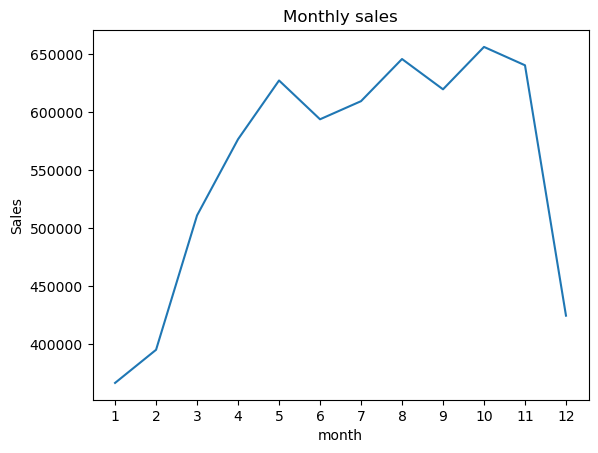

In [13]:
transactions['month'] = transactions['date'].dt.month
transactions.groupby('month')['SALES_VALUE'].sum().plot(kind='line')
plt.xticks(transactions['month'].unique())
plt.title('Monthly sales')
plt.xlabel('month')
plt.ylabel('Sales');

* sales are growing over time from January to may, then dipping a bit in the period between may and june.
* tehn it rises again until August, after which it dips in the period between august and september.
* the sales increase again and are the maxiumum in October, probably due to Hallowee. and then they start decreasing slowly at first till novemeber and then steeply.

In [19]:
transactions['year'] = transactions['date'].dt.year

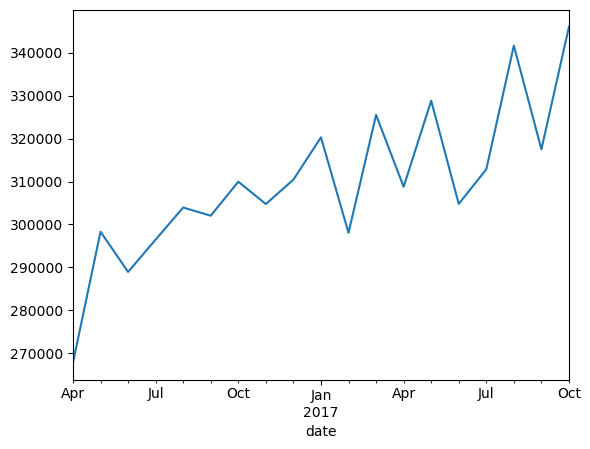

In [26]:
(transactions
.set_index('date')
.loc['2016-04':'2017-10', 'SALES_VALUE']
.resample('M')
.sum()
.plot());

In [34]:
# calcualting price
# creating separage columns for month and year

transactions['price'] = transactions['QUANTITY'] * transactions['SALES_VALUE']
transactions['month'] = transactions['date'].dt.month
transactions['year'] = transactions['date'].dt.year

In [42]:
sales_2016 = transactions[transactions['year'] == 2016].groupby('month', as_index=False)['price'].sum().round(2)
sales_2017 = transactions[transactions['year'] == 2017].groupby('month', as_index=False)['price'].sum().round(2)

In [31]:
transactions.head()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,date,month,price
0,1364,1215092485,-9038,1,2.19,31742,2016-01-01,1,2.19
1,1364,1215092485,-20460,1,2.99,31742,2016-01-01,1,2.99
2,1364,1215092485,3451,1,3.09,31742,2016-01-01,1,3.09
3,1364,1215092485,19902,1,2.50,31742,2016-01-01,1,2.50
4,1364,1215092485,-1280,1,0.60,31742,2016-01-01,1,0.60


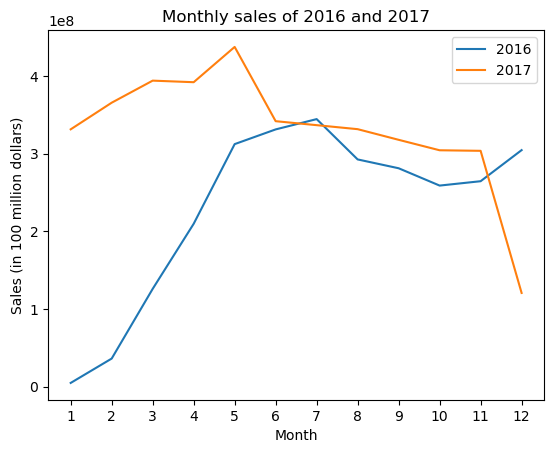

In [50]:
plt.plot(sales_2016['month'], sales_2016['price'], label='2016')
plt.plot(sales_2017['month'], sales_2017['price'], label='2017')
plt.legend()
plt.title('Monthly sales of 2016 and 2017')
plt.xlabel('Month')
plt.ylabel('Sales (in 100 million dollars)')
plt.xticks(range(1,13));

In [58]:
transactions['day_of_week'] = transactions['date'].dt.weekday

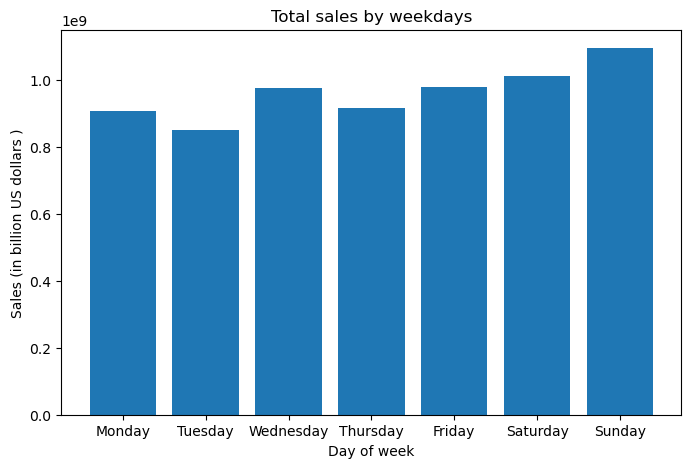

In [71]:
sales_per_day = transactions.groupby('day_of_week', as_index=False)['price'].sum().round(2)

plt.figure(figsize=(8,5))
plt.bar(sales_per_day['day_of_week'], sales_per_day['price'])
plt.title('Total sales by weekdays')
plt.xlabel('Day of week')
plt.ylabel('Sales (in billion US dollars )')
plt.gca().set_xticks(sales_per_day['day_of_week'])
plt.gca().set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday' , 'Sunday']);

In [102]:
# dropping month, price, year and dayofweek columns because they are no longer useful

transactions.drop(columns=['month', 'price', 'year', 'day_of_week'], inplace=True)

# DEMOGRAPHICS

* Read in the `hh_demographic.csv` file, but only the columns `AGE_DESC`, `INCOME_DESC`, `household_key`, and `HH_COMP_DESC`. Convert the appropriate columns to the category dtype.


* Then group the transactions table by household_id, and calculate the sum of SALES VALUE by household.


* Once you've done that, join the demographics DataFrame to the aggregated transactions table(table that has total sales per household). Since we're interested in analyzing the demographic data we have, make sure not to include rows from transactions that don't match.


* Plot the sum of sales by age_desc and income_desc (in separate charts).


* Then, create a pivot table of the mean household sales by `AGE_DESC` and `HH_COMP_DESC`. Which of our demographics have the highest average sales?


In [72]:
dem_cols = ['AGE_DESC', 'INCOME_DESC', 'household_key', 'HH_COMP_DESC']

dem_dtypes = {'AGE_DESC' : 'category', 'INCOME_DESC' : 'category', 'HH_COMP_DESC': 'category'}

demographics = pd.read_csv('../project_data/hh_demographic.csv',
                          usecols = dem_cols,
                          dtype = dem_dtypes)

In [73]:
demographics.head(3)

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key
0,65+,35-49K,2 Adults No Kids,1
1,45-54,50-74K,2 Adults No Kids,7
2,25-34,25-34K,2 Adults Kids,8


In [74]:
#sales value by household

household_sales = (transactions.
                  groupby('household_key')
                  .agg({'SALES_VALUE': 'sum'}))

household_sales

,SALES_VALUE
household_key,
1,4330.16
2,1954.34
3,2653.21
4,1200.11
5,779.06
...,...
2095,3790.49
2096,1301.65
2097,8823.83


In [80]:
household_and_demo = household_sales.merge(demographics, how='inner', left_on='household_key', right_on='household_key')

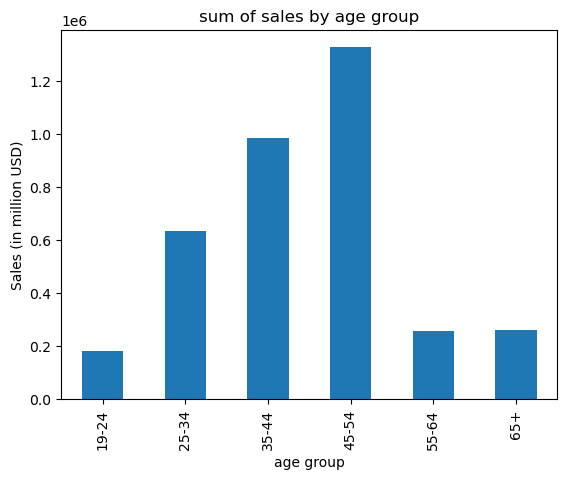

In [85]:
household_and_demo.groupby('AGE_DESC')['SALES_VALUE'].sum().plot(kind='bar')
plt.title('sum of sales by age group')
plt.xlabel('age group')
plt.ylabel('Sales (in million USD)');

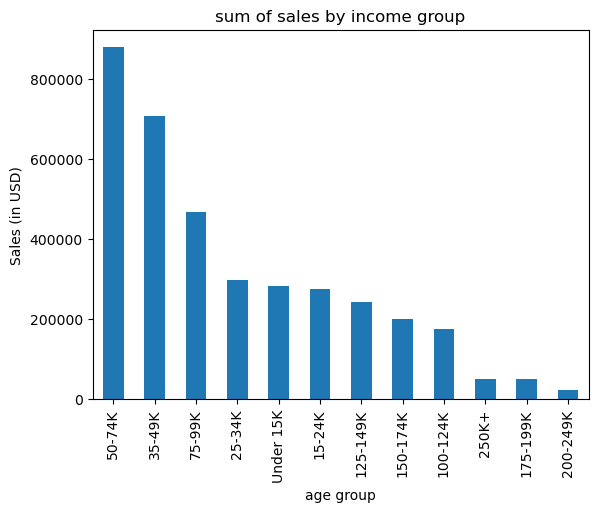

In [96]:
# sum of sales by income group

household_and_demo.groupby('INCOME_DESC')['SALES_VALUE'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('sum of sales by income group')
plt.xlabel('age group')
plt.ylabel('Sales (in USD)');

In [94]:
pd.pivot_table(household_and_demo, index='AGE_DESC', columns= 'HH_COMP_DESC',values='SALES_VALUE', aggfunc='mean')

HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown
AGE_DESC,,,,,,
19-24,7268.796667,5428.945000,4020.800000,4576.095556,3216.835000,4911.275000
25-34,5512.196875,5753.973514,5638.515833,4807.440588,4909.522381,7356.270000
35-44,6297.737778,6691.772264,6260.412444,6015.192069,4844.192000,4227.691818
45-54,6632.569167,6610.484490,5839.527027,4549.365405,4636.637083,4843.995682
55-64,3064.870000,4695.655000,5752.413684,4816.148462,3922.546250,7973.750000
65+,4040.810000,5536.866667,4614.108571,4059.699412,3871.556000,2879.290000


- Households that have 1 adult and kids and fall in the age group of 19-24 years have the highest average sales

In [97]:
# delete dataframes we won't use anymore

del [household_and_demo, household_sales]

# PRODUCT DEMOGRAPHICS

* Read in the product csv file.

* Only read in product_id and department from product (consider converting columns).

* Join the product DataFrame to transactions and demographics tables, performing an inner join when joining both tables.

* Finally, pivot the fully joined dataframe by AGE_DESC and DEPARTMENT, calculating the sum of sales. Which category does our youngest demographic perform well in?



In [114]:
# specify columns to use
product_cols = ["PRODUCT_ID", "DEPARTMENT"]

# specify datatypes for each column
product_dtypes = {"PRODUCT_ID": "Int32", "DEPARTMENT": "category"}

product = pd.read_csv('../project_data/product.csv',
                     usecols=product_cols,
                     dtype=product_dtypes
                     )

In [116]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   PRODUCT_ID  92353 non-null  Int32   
 1   DEPARTMENT  92353 non-null  category
dtypes: Int32(1), category(1)
memory usage: 542.6 KB


In [129]:
# merging product, demographics and transactions dataframe

final_df = (product
            .merge(transactions, 
                   how='inner', 
                   left_on='PRODUCT_ID', 
                   right_on='PRODUCT_ID')
            .merge(demographics, 
                   how='inner', 
                   left_on='household_key', 
                   right_on='household_key'))

In [130]:
# creating a price column

final_df['price'] = final_df['QUANTITY'] * final_df['SALES_VALUE']

In [132]:
# creating a pivot table

demography_and_cat = (pd.pivot_table(final_df, 
                             index='DEPARTMENT', 
                             columns='AGE_DESC', 
                             values='SALES_VALUE', 
                             aggfunc='sum'))

In [133]:
# sorting the pivot table by '19-24' column to find which category  has this youngest category done the best in 
demography_and_cat.sort_values(by='19-24', ascending=False)

AGE_DESC,19-24,25-34,35-44,45-54,55-64,65+
DEPARTMENT,,,,,,
GROCERY,294.74,915.40,2620.31,2676.39,837.71,599.13
DRUG GM,49.90,172.79,502.63,760.60,109.48,110.78
PRODUCE,22.28,104.81,167.28,199.33,65.44,37.86
NUTRITION,1.52,0.00,0.00,5.02,0.00,0.00
,0.00,0.00,0.00,0.00,0.00,0.00
MISC. TRANS.,0.00,0.00,0.00,0.00,0.00,0.00
PASTRY,0.00,10.59,27.45,40.79,14.99,20.95
PHARMACY SUPPLY,0.00,0.00,0.00,0.00,0.00,0.00
PHOTO,0.00,0.00,0.00,0.00,0.00,0.00


- The youngest age category , ie. 19-24 years shockingly performs the best in the grocery category.

# EXPORT

Finally, export your pivot table to an excel file. Make sure to provide a sheet name.

In [136]:
# exporting the pivot table

demography_and_cat.to_excel('demographic_category_sales.xlsx', sheet_name='sales_pivot')